In [77]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [74]:
# review = str(input('Enter you review':))

review = str("This could have being the perfect laptop, but its NOT. It already has specs which are in the range of 50-60k machines like metal chassis, i5 10th gen processor, MX250 gpu, decent battery backup. But limitation on RAM upgrade and SSD SATA 3 type, are too significant to neglect. I will personally opt for laptop with NVME SSD and upgradable RAM, even if it doesn't have MX250 or metal chassis, as like any typical Indian consumer I will invests into laptop to retain it for least 2-3 years. And looking at the media consumption level and softwares evolving these days, 8GB RAM and 600mbps SSD is certainly going to struggle in a year max. So if you have 48k at disposal and don't bother for higher system performance, and want a laptop for normal media consumption, then go ahead with this. But if you are like me, an typical Indian consumer which prefers performance in long run, then stay away from this. There are better alternatives to this like Asus vivobook 14, Lenovo Slim 3i, Acer swift 3, etc. Hope this help you make sound purchase decision.")

In [10]:
review

"This could have being the perfect laptop, but its NOT. It already has specs which are in the range of 50-60k machines like metal chassis, i5 10th gen processor, MX250 gpu, decent battery backup. But limitation on RAM upgrade and SSD SATA 3 type, are too significant to neglect. I will personally opt for laptop with NVME SSD and upgradable RAM, even if it doesn't have MX250 or metal chassis, as like any typical Indian consumer I will invests into laptop to retain it for least 2-3 years. And looking at the media consumption level and softwares evolving these days, 8GB RAM and 600mbps SSD is certainly going to struggle in a year max. So if you have 48k at disposal and don't bother for higher system performance, and want a laptop for normal media consumption, then go ahead with this. But if you are like me, an typical Indian consumer which prefers performance in long run, then stay away from this. There are better alternatives to this like Asus vivobook 14, Lenovo Slim 3i, Acer swift 3, et

In [22]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

one_block = review
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [23]:
one_block

"This could have being the perfect laptop, but its NOT. It already has specs which are in the range of 50-60k machines like metal chassis, i5 10th gen processor, MX250 gpu, decent battery backup. But limitation on RAM upgrade and SSD SATA 3 type, are too significant to neglect. I will personally opt for laptop with NVME SSD and upgradable RAM, even if it doesn't have MX250 or metal chassis, as like any typical Indian consumer I will invests into laptop to retain it for least 2-3 years. And looking at the media consumption level and softwares evolving these days, 8GB RAM and 600mbps SSD is certainly going to struggle in a year max. So if you have 48k at disposal and don't bother for higher system performance, and want a laptop for normal media consumption, then go ahead with this. But if you are like me, an typical Indian consumer which prefers performance in long run, then stay away from this. There are better alternatives to this like Asus vivobook 14, Lenovo Slim 3i, Acer swift 3, et

In [24]:
for token in doc_block[0:20]:
    print(token, token.pos_)

This DET
could AUX
have VERB
being VERB
the DET
perfect ADJ
laptop NOUN
, PUNCT
but CCONJ
its PRON
NOT PART
. PUNCT
It PRON
already ADV
has VERB
specs NOUN
which DET
are VERB
in ADP
the DET


In [26]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[:])

['have', 'being', 'laptop', 'has', 'specs', 'are', 'range', 'machines', 'metal', 'chassis', 'gen', 'processor', 'gpu', 'battery', 'backup', 'limitation', 'RAM', 'upgrade', 'SSD', 'type', 'neglect', 'opt', 'laptop', 'RAM', 'have', 'metal', 'chassis', 'consumer', 'invests', 'laptop', 'retain', 'years', 'looking', 'media', 'consumption', 'level', 'softwares', 'evolving', 'days', 'going', 'struggle', 'year', 'max', 'have', '48k', 'disposal', 'bother', 'system', 'performance', 'want', 'laptop', 'media', 'consumption', 'go', 'are', 'consumer', 'prefers', 'performance', 'run', 'stay', 'alternatives', 'vivobook', '3i', 'swift', 'Hope', 'help', 'make', 'purchase', 'decision']


In [27]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,laptop,4
1,have,3
2,are,2
3,metal,2
4,chassis,2
5,ram,2
6,consumer,2
7,media,2
8,consumption,2
9,performance,2


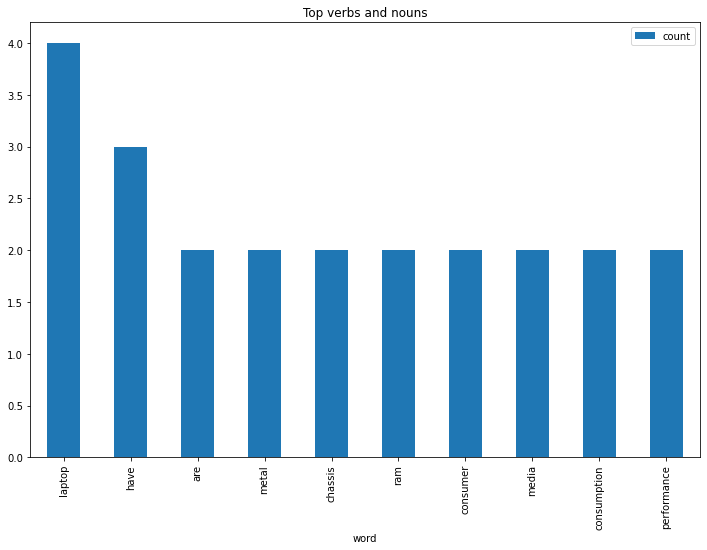

In [28]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [42]:
#Sentiment analysis
afinn = pd.read_csv(r'F:\pk\01_Data_science\ASSIGNMENTS\11_Text_Mining\afinncsv.csv',encoding='latin-1')
#sep=',', encoding='latin-1'
afinn.shape

(2477, 2)

In [43]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [47]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PawanK\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [48]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(review)
sentences

['This could have being the perfect laptop, but its NOT.',
 'It already has specs which are in the range of 50-60k machines like metal chassis, i5 10th gen processor, MX250 gpu, decent battery backup.',
 'But limitation on RAM upgrade and SSD SATA 3 type, are too significant to neglect.',
 "I will personally opt for laptop with NVME SSD and upgradable RAM, even if it doesn't have MX250 or metal chassis, as like any typical Indian consumer I will invests into laptop to retain it for least 2-3 years.",
 'And looking at the media consumption level and softwares evolving these days, 8GB RAM and 600mbps SSD is certainly going to struggle in a year max.',
 "So if you have 48k at disposal and don't bother for higher system performance, and want a laptop for normal media consumption, then go ahead with this.",
 'But if you are like me, an typical Indian consumer which prefers performance in long run, then stay away from this.',
 'There are better alternatives to this like Asus vivobook 14, Len

In [49]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [50]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [71]:
# test that it works
value = calculate_sentiment(text = review)

Positive


In [75]:


wordcount = len(review.split())
wordcount

187

In [76]:
if value == 0:
    print('Nutral')
elif value > 0:
    print('Happy')
else:
    print('Sad')

Happy
